# As in Exercise 9, assume that you have a sequence of occurrences, but now assume that the time X between occurrences is uniformly distributed between 5 and 15

# As before, you come upon this system at time 100, and wait until the next occurrence

# Make a conjecture concerning how long, on average, you'll need to wait

# Write a program to see if the conjecture is correct

___

# Conjecture: the result will be the same as Exercise 9 (since the average time between occurrences will still be 10)

### Writing the simulation

In [2]:
import numpy as np

In [8]:
results = []

while len(results)<10000:
    rnd = np.random.random(size = 1000000)
    lambda_array = np.random.uniform(low = 5, high = 15, size = 1000000)
    
    array = (-lambda_array)*np.log(rnd)
    
    array = array*(array>100)
    array = array[np.nonzero(array)]
    
    results = results + list(array)

In [9]:
np.mean(results)

113.34449381060466

# We were wrong!

### To see why, we can look at the lambda value for each occurrence that's over 100 and see which lambda value it was

In [10]:
results = []
lambdas = []

while len(results)<10000:
    rnd = np.random.random(size = 1000000)
    lambda_array = np.random.uniform(low = 5, high = 15, size = 1000000)
    
    array = (-lambda_array)*np.log(rnd)
    
    array = array*(array>100)
    array = array[np.nonzero(array)]
    lambda_array = lambda_array[np.nonzero(array)]
    
    results = results + list(array)
    lambdas = lambdas + list(lambda_array)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

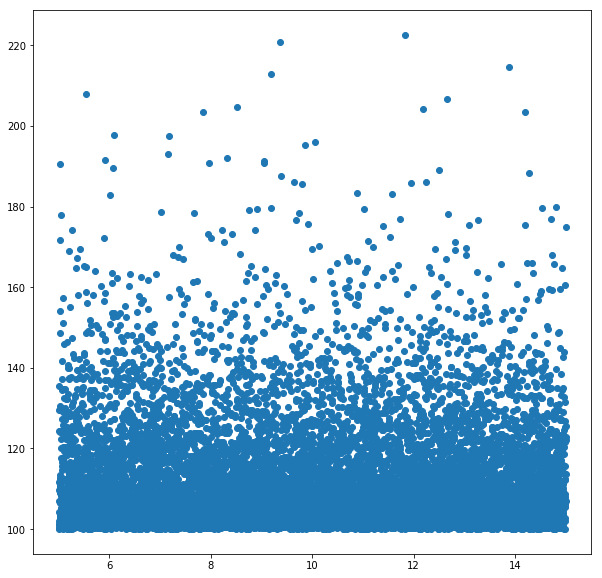

In [13]:
plt.scatter(lambdas, results)

### Not illuminating, so let's try grouping the values into three ranges

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame({'lambda':lambdas, 't':results})

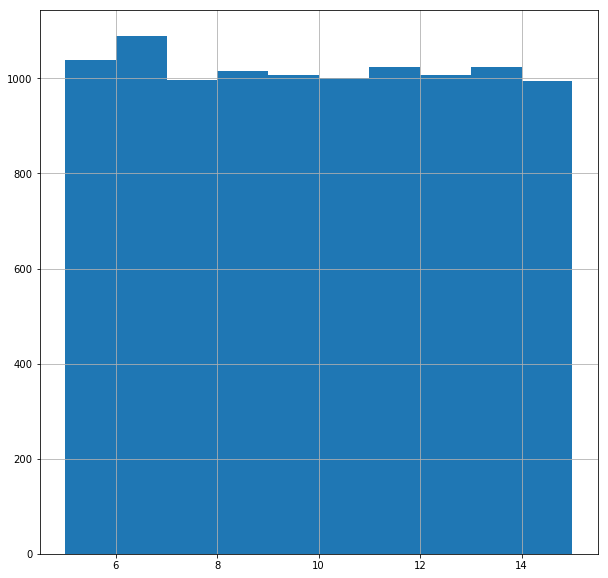

In [22]:
df['lambda'].hist()

### The lambdas seem to be pretty uniformly distributed, even for the occurrences that make it past 100

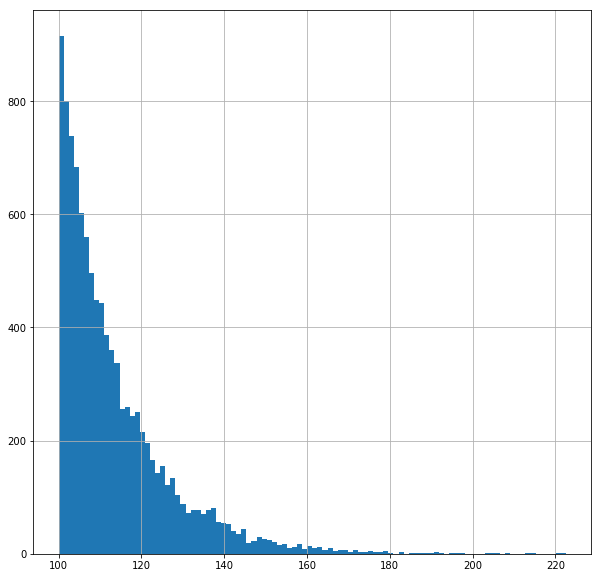

In [25]:
df['t'].hist(bins = 100)

In [27]:
def mapper(val):
    if val<7.5:
        return 0
    elif val<10:
        return 1
    elif val<12.5:
        return 2
    else:
        return 3

In [28]:
df['mapped'] = df['lambda'].map(mapper)

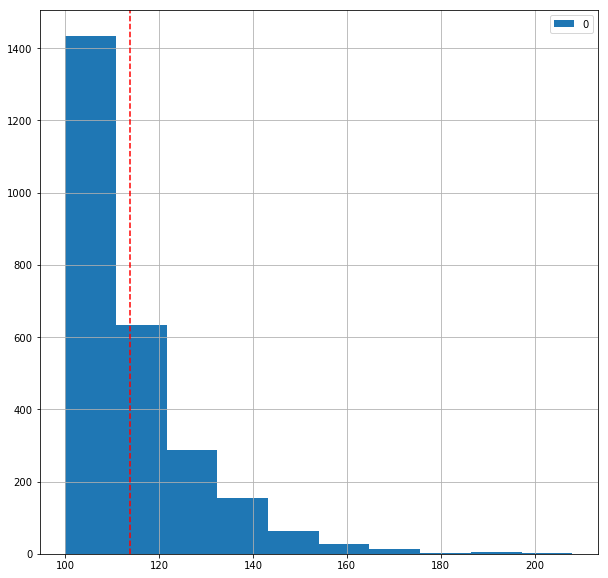

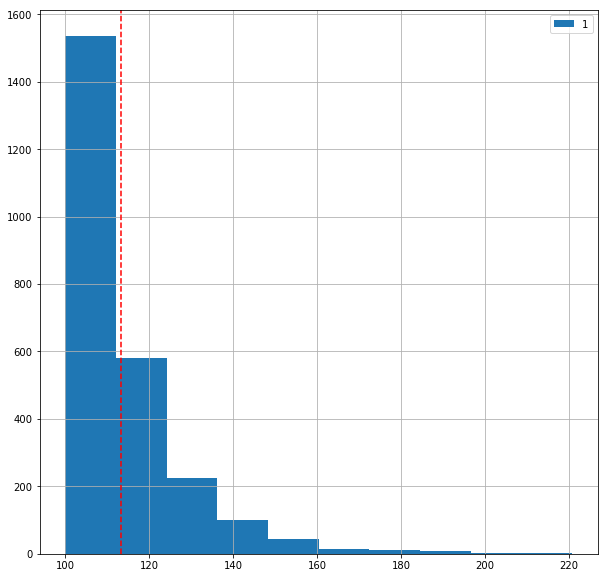

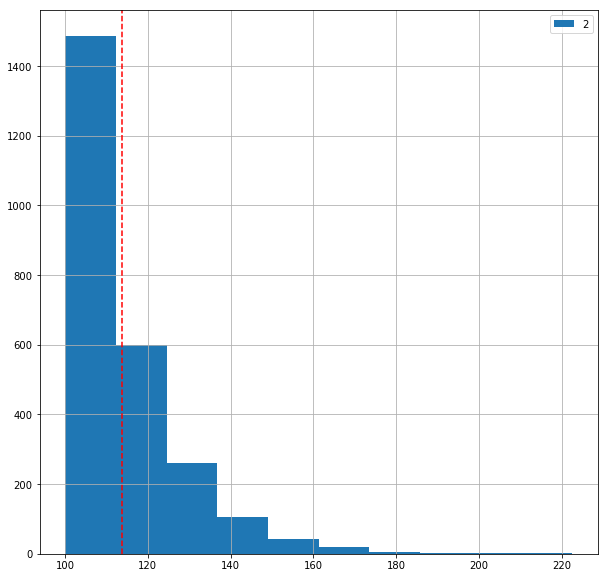

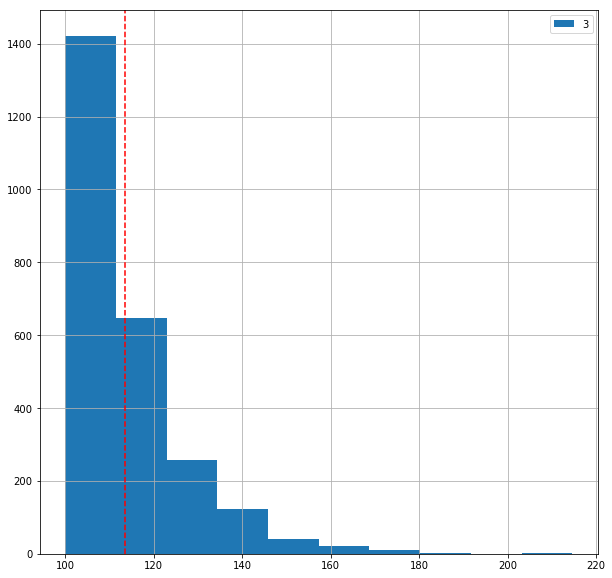

In [33]:
for i in [0,1,2,3]:
    df_temp = df[df['mapped']==i]
    df_temp['t'].hist(label = str(i))
    mean = df_temp['t'].mean()
    plt.axvline(mean, ls = 'dashed', color = 'r')
    plt.legend()
    plt.show()

In [35]:
df.groupby('mapped').describe()

lambda                                                        \
         count       mean       std        min        25%        50%   
mapped                                                                 
0       2622.0   6.253810  0.715200   5.003691   5.630115   6.263238   
1       2523.0   8.748159  0.719070   7.501041   8.123457   8.741779   
2       2524.0  11.246216  0.717375  10.000585  10.621820  11.230658   
3       2527.0  13.742875  0.721321  12.500745  13.123426  13.739216   

                                   t                                     \
              75%        max   count        mean        std         min   
mapped                                                                    
0        6.852764   7.499140  2622.0  113.819008  13.882418  100.004265   
1        9.347024   9.998415  2523.0  113.355168  14.287850  100.007540   
2       11.860032  12.496781  2524.0  113.824159  13.847120  100.015520   
3       14.384510  14.997813  2527.0  113.584712  13.387416  100.002048   

                                                        
               25%         50%         75%         max  
mapped                                                  
0       103.740015  109.593676  119.488295  207.988609  
1       103.560541  108.775052  117.982956  220.812911  
2       104.126990  109.446180  119.471453  222.558963  
3       103.925384  109.711625  118.920350  214.628781